In [166]:
import os
from statistics import correlation

import cartopy.crs as ccrs
import sys
import glob
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import datetime
from pathlib import Path
import netCDF4
import matplotlib.dates as mdates
from fontTools.varLib.avarPlanner import normalizeDegrees

In [167]:
path_file= Path(r"C:\Users\vazqu\OneDrive - UQAM\UQAM\5e session\Laboratoire3\tp1\imerg_pr_201911_3h.nc4")

In [168]:

print(path_file)
ds = xr.open_dataset(path_file,engine="netcdf4")



C:\Users\vazqu\OneDrive - UQAM\UQAM\5e session\Laboratoire3\tp1\imerg_pr_201911_3h.nc4


In [169]:
#Coordonne des villes souhaités
Kuala_cor= {"lat":3.1,"lon":101.6}
Montreal_cor={"lat":45.5,"lon":-73.5}
ocean_cor={"lat":5.0,"lon":106.0}
sevile_cor={"lat":37.4,"lon":-6}

In [170]:
#Prendre les data sets des coordonne les plus proches
kuala_ds = ds.sel(Kuala_cor,method='nearest')
mtl_ds = ds.sel(Montreal_cor,method='nearest')
ocean_ds = ds.sel(ocean_cor,method='nearest')
seville_ds = ds.sel(sevile_cor,method='nearest')

liste_nom_ville=["Kuala","MTL","Ocean","Seville"]


kuala_pand=kuala_ds.to_dataframe()
mtl_pand=mtl_ds.to_dataframe()
ocean_pand=ocean_ds.to_dataframe()
seville_pand=seville_ds.to_dataframe()


In [171]:
liste_ville=[kuala_pand,mtl_pand,ocean_pand,seville_pand]
liste_ville_n=[]
for ville in liste_ville:
    ville=ville.reset_index(level='bnds',drop=True)
    ville=ville.drop('time_bnds',axis=1)
    #ville.index=ville.index.strftime('%d-%H')
    ville.reset_index()
    ville=ville[~ville.index.duplicated(keep='first')]
    liste_ville_n.append(ville)



In [172]:
#print((liste_ville_n[1])['precipitationCal'].values)
tableau= pd.DataFrame(columns=liste_nom_ville)

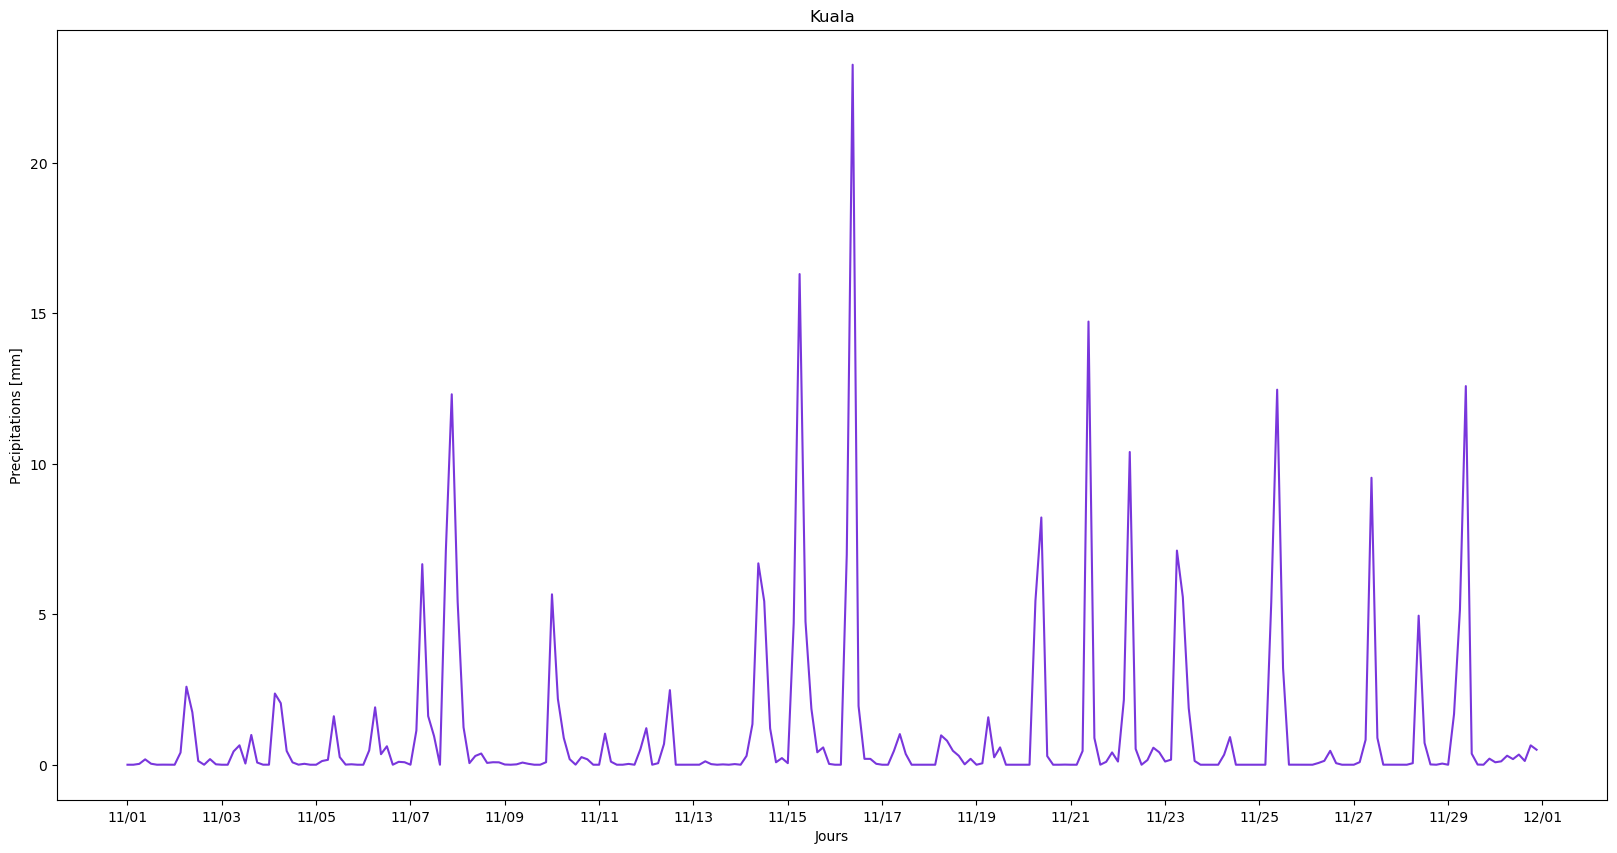

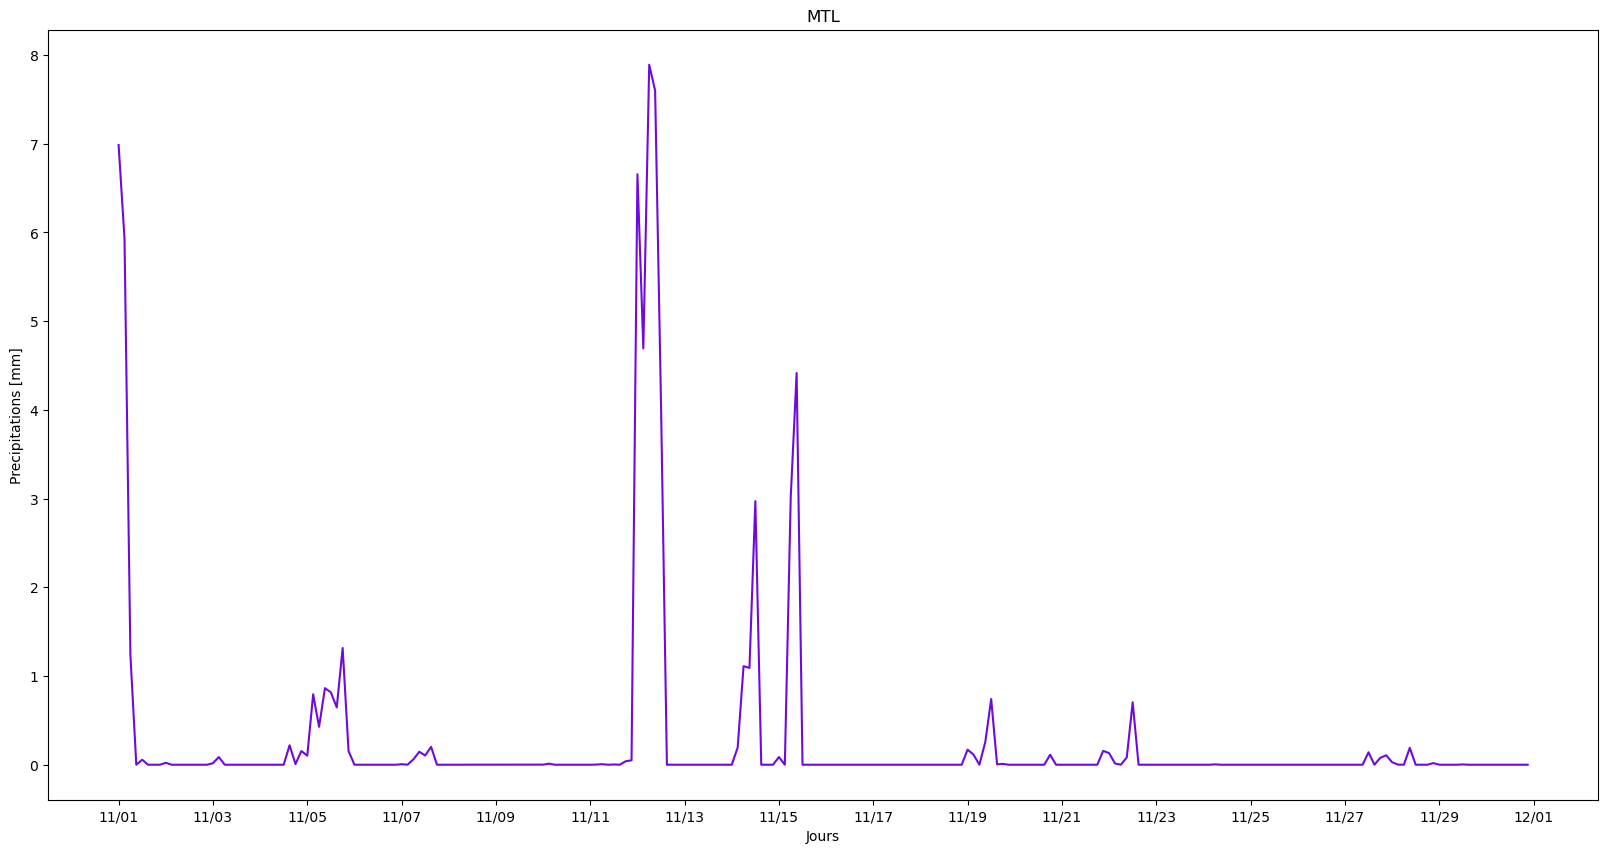

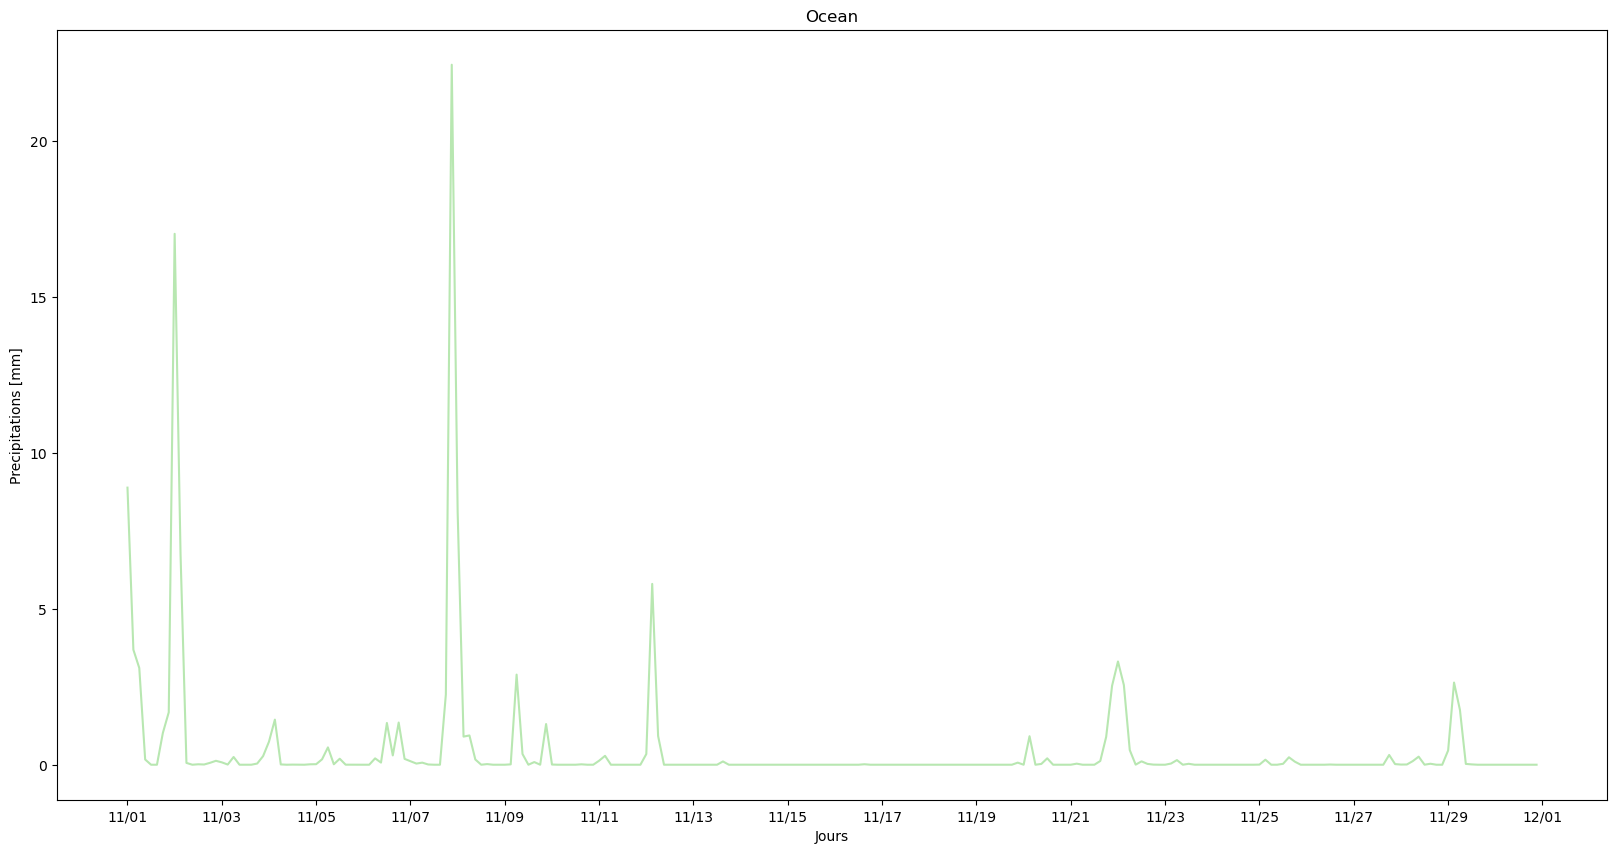

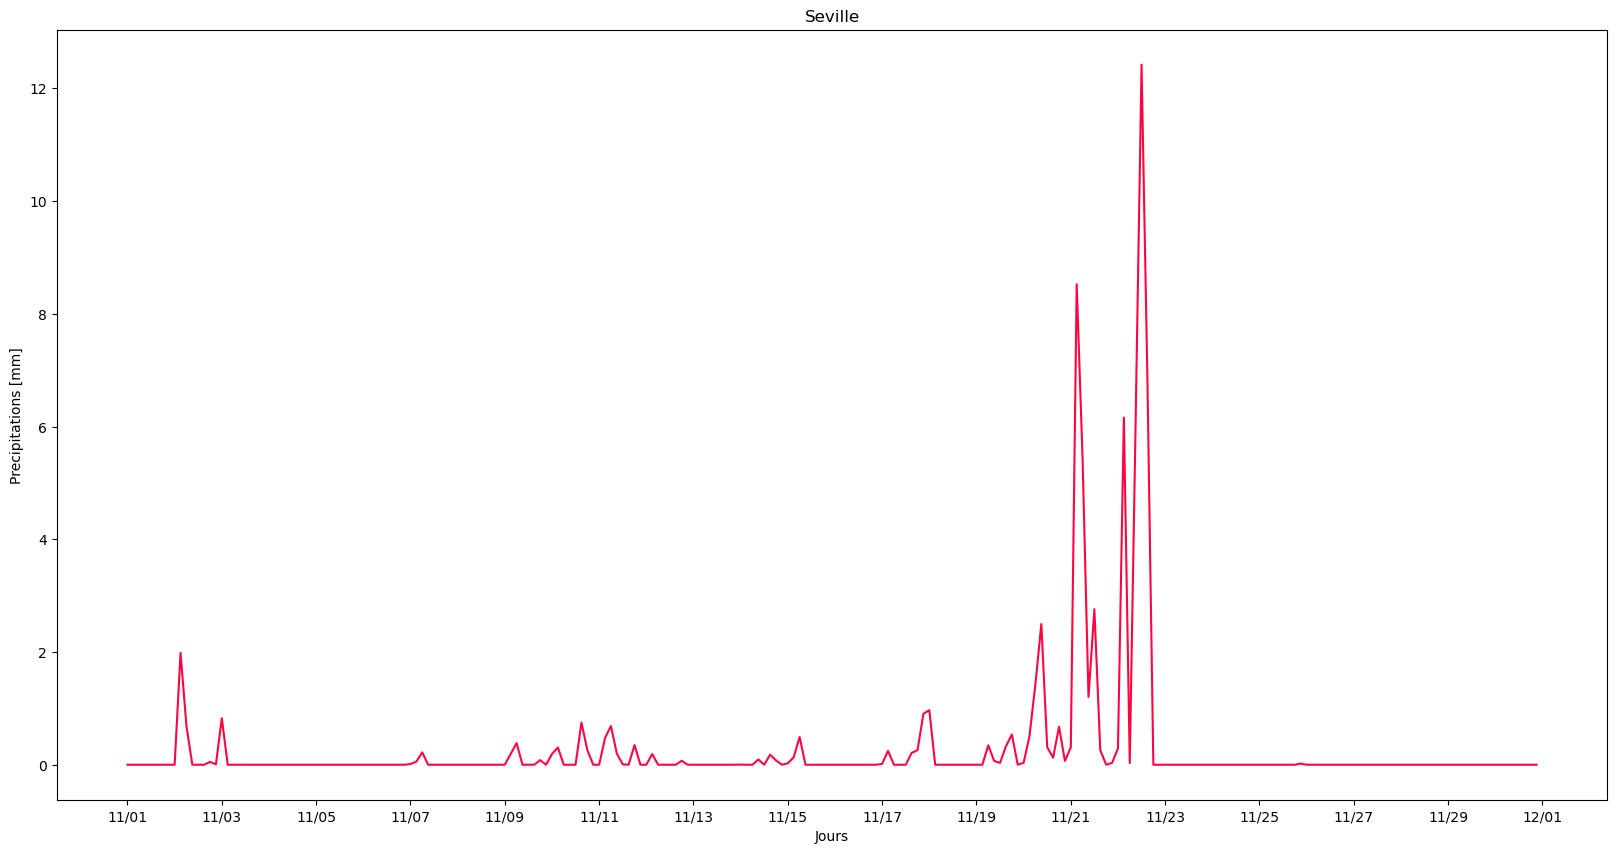

In [173]:
i=0
for ville in liste_ville_n:
    x=ville.index.values
    y=ville['precipitationCal'].values
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    col=(np.random.random(), np.random.random(), np.random.random())
    ax.plot(x,y,c=col)
    ax.set_ylabel('Precipitations [mm]')
    ax.set_xlabel('Jours')
    ax.set_title(liste_nom_ville[i])
    i=i+1
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.show()

In [174]:
#3.a
#Somme des precipitations par ville
somme_precip=[]
for ville in liste_ville_n:
    somme_precip.append(round(float(ville['precipitationCal'].sum()),2))
print(liste_nom_ville)
print("Somme des precipitations :",somme_precip)
tableau.loc['Accum.Total',liste_nom_ville]=somme_precip


['Kuala', 'MTL', 'Ocean', 'Seville']
Somme des precipitations : [277.08, 67.31, 114.87, 68.89]


In [175]:
#3.b
#Nombre de donne de 3h avec plus de 0 mm de precipitations

nb_lignes_new=[]
nb_lignes_old=[]
fraction=[]
for ville in liste_ville_n:
    precipitation_mesure=ville[ville['precipitationCal']!=0]
    nb_lignes_old=(len(ville['precipitationCal']))
    nb_lignes_new.append(len(precipitation_mesure))
    fraction.append(round(len(precipitation_mesure)/len(ville['precipitationCal']),2))
    
print(liste_nom_ville)
print("Nombre de mesures avec precipitation ",nb_lignes_new)
print("Fréquence de précipitation [%]:",fraction)
tableau.loc['Nombre de mesures avec precipitation',liste_nom_ville]=nb_lignes_new
tableau.loc['Fréquence de précipitation [%]',liste_nom_ville]=fraction

['Kuala', 'MTL', 'Ocean', 'Seville']
Nombre de mesures avec precipitation  [167, 64, 97, 64]
Fréquence de précipitation [%]: [0.7, 0.27, 0.4, 0.27]


In [181]:
#3.c
#Precipitation moyenne et intensite de precipitation
precip_moyen=[]
intensite_precip=[]
for ville in liste_ville_n:
    precip_moyen.append(round(float(np.mean(ville['precipitationCal'].values)),2))
    intensite_precip.append(round(float(np.mean(ville.loc[ville['precipitationCal']!=0,'precipitationCal'].values)),2))
    
print(liste_nom_ville)
print("Precipitation moyenne : ",precip_moyen)
print("Intensité de précipitation moyenne : ",intensite_precip)
tableau.loc["Precipitation moyenne [mm]",liste_nom_ville]=precip_moyen
tableau.loc['Intensite de precipitation moyenne [mm]',liste_nom_ville]=intensite_precip

['Kuala', 'MTL', 'Ocean', 'Seville']
Precipitation moyenne :  [1.15, 0.28, 0.48, 0.29]
Intensité de précipitation moyenne :  [1.66, 1.05, 1.18, 1.08]


In [177]:
#3.d
#Evenement de precipitation

liste_dure_evenement=[]
total_compte=[]
for ville in liste_ville_n:
    precipitation=ville['precipitationCal'].values
    liste_ville_evenement=[]
    evenement=[]
    compte=0
    liste_compte=[]
    for i in range(len(precipitation)):
        if precipitation[i]>0:
            compte+=1
            evenement.append(float(precipitation[i]))
        else: 
            if evenement:
                liste_ville_evenement.append(evenement)
                liste_compte.append(compte)
                evenement=[]
                compte=0
    if evenement:
        liste_ville_evenement.append(evenement)
        liste_compte.append(compte)
        
    total_compte.append(liste_compte)
    liste_dure_evenement.append(liste_ville_evenement)
liste_dure_max=[]
for i in range(4):
    #print(liste_nom_ville[i])
    #print('Compte des evenements : ',total_compte[i])
    #print("Duree maximum evenement [h] : ", (np.max(total_compte[i]))*3,'\n')
    #print('Evenement [mm]: ', liste_dure_evenement[i])
    #print("\n")
    liste_dure_max.append((np.max(total_compte[i]))*3)
tableau.loc['Duree Max evenement [h]',liste_nom_ville]=liste_dure_max

Kuala
Compte des evenements :  [3, 1, 4, 2, 13, 6, 4, 7, 11, 3, 8, 2, 2, 2, 3, 3, 1, 1, 15, 7, 3, 6, 4, 3, 1, 3, 6, 9, 2, 4, 4, 5, 4, 1, 5, 9]
Duree maximum evenement [h] :  45 

Evenement [mm]:  [[0.028415871784090996, 0.1783340722322464, 0.03301599621772766], [0.002341238781809807], [0.40436798334121704, 2.5907649993896484, 1.7431056499481201, 0.12473034113645554], [0.18576455116271973, 0.013714153319597244], [0.44309917092323303, 0.6444153785705566, 0.03912729769945145, 0.989122211933136, 0.07284238189458847, 0.0011482491390779614, 0.001495187170803547, 2.36489200592041, 2.0433785915374756, 0.4572699964046478, 0.07814738899469376, 0.0018588707316666842, 0.030696334317326546], [0.12267531454563141, 0.1629858762025833, 1.6099307537078857, 0.25348779559135437, 0.004264270421117544, 0.014685400761663914], [0.4756576716899872, 1.9055620431900024, 0.349203497171402, 0.6128281950950623], [0.09629306197166443, 0.08246801048517227, 4.8439927923027426e-05, 1.1339071989059448, 6.6605544090271,

In [178]:
#3.e
#Valeur maximum de taux de precipitation
taux_max=[]
for ville in liste_ville_n:
    taux_max.append(ville['precipitationCal'].max())
print(liste_nom_ville)
print("Valeur de taux de precipitation maximum [mm]: ",taux_max)
tableau.loc['Taux maximum precipitation',liste_nom_ville]=taux_max

['Kuala', 'MTL', 'Ocean', 'Seville']
Valeur de taux de precipitation maximum [mm]:  [23.24861717224121, 7.889941692352295, 22.457836151123047, 12.41816234588623]


Nord :  0.5410781409305001 Sud: 0.5044237553220117 est : 0.3117622013444825 ouest :  0.23448706503157082


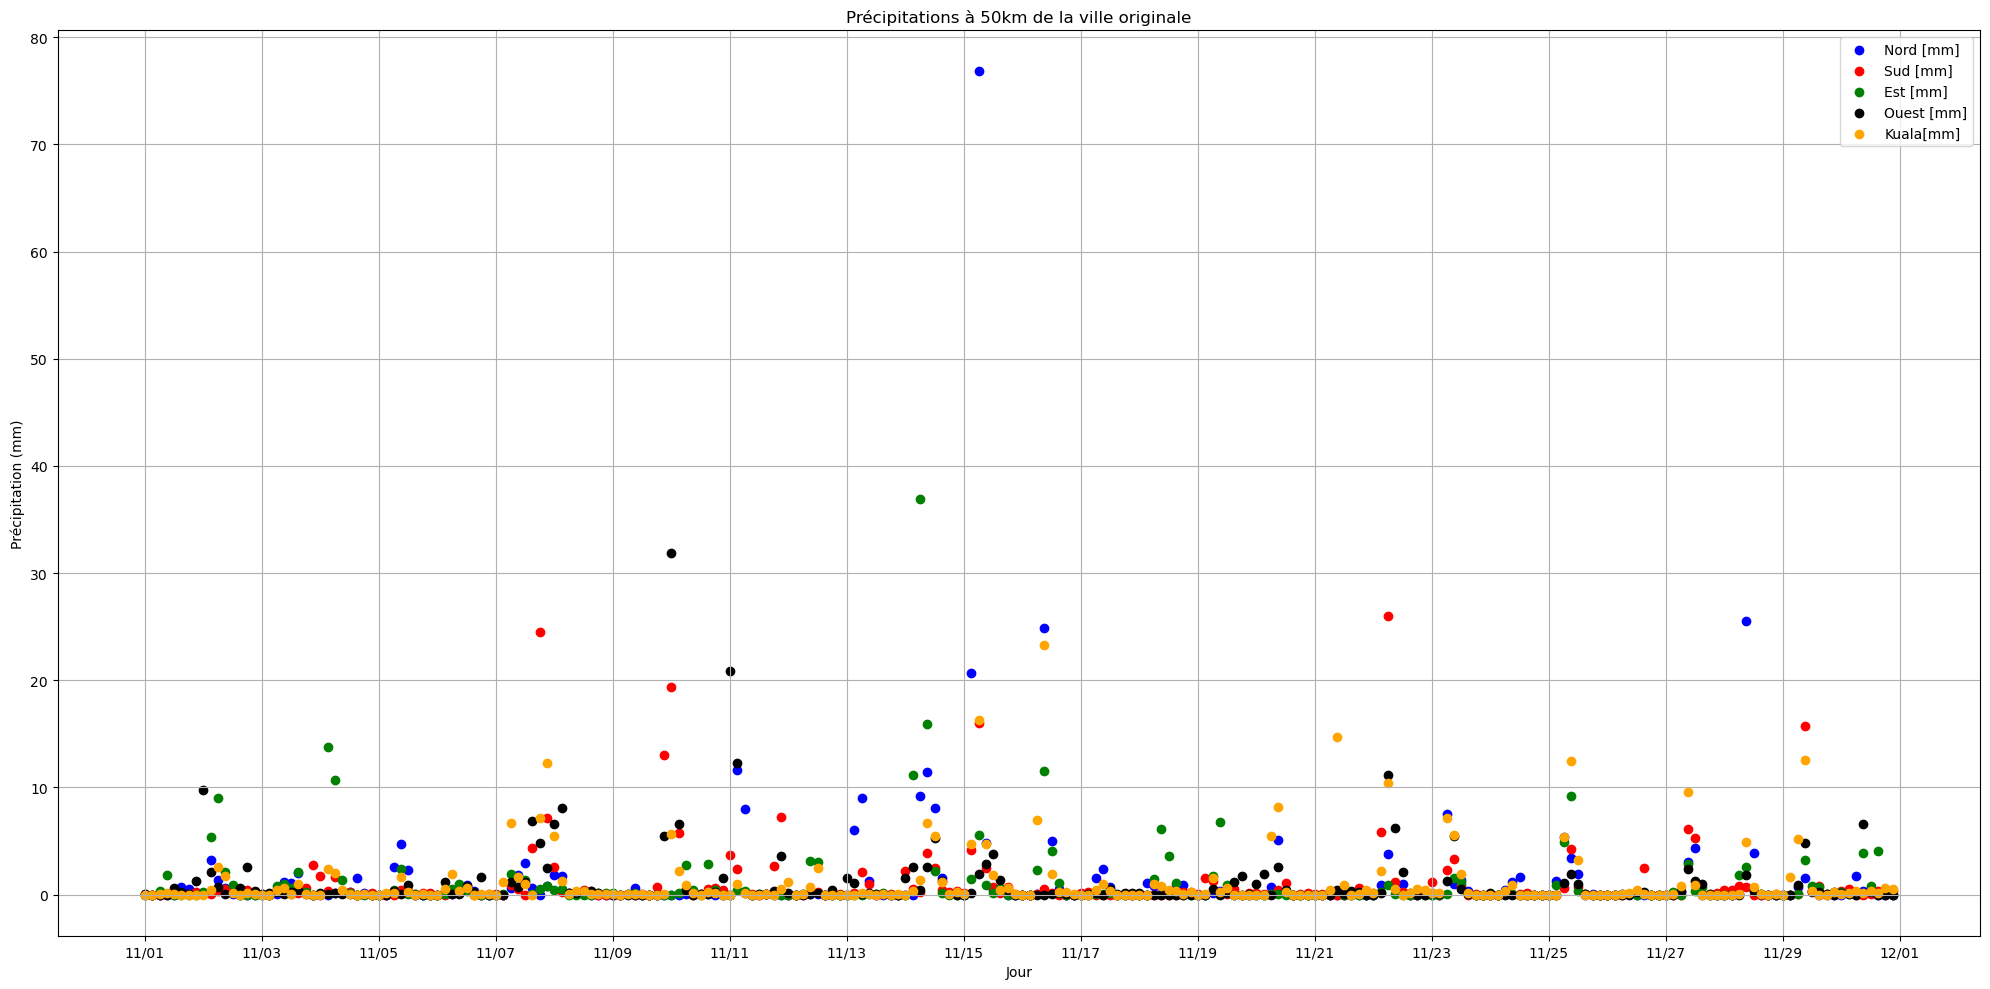

Nord :  0.8504478916588084 Sud: 0.8174258535795319 est : 0.8629692338774724 ouest :  0.6099912472578278


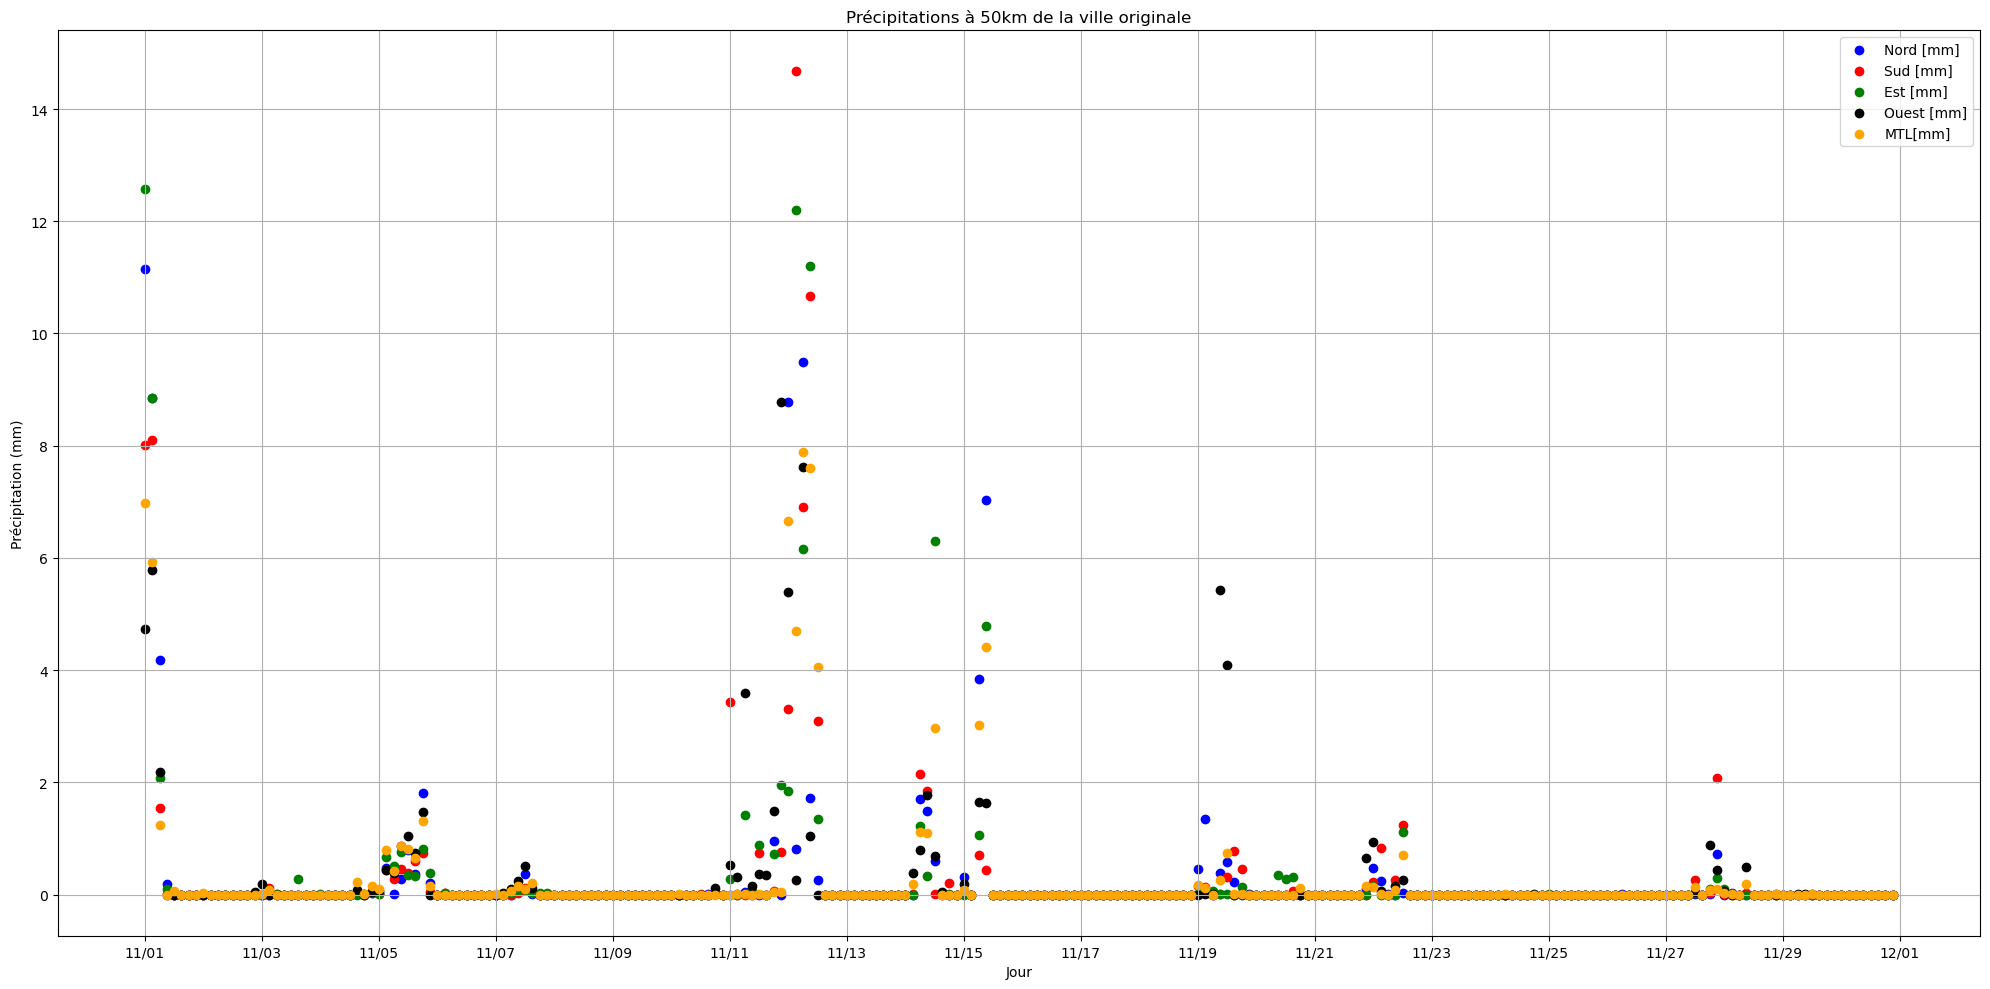

Nord :  0.4267021954914435 Sud: 0.7492144058117366 est : 0.4387220521634854 ouest :  0.6910333602748062


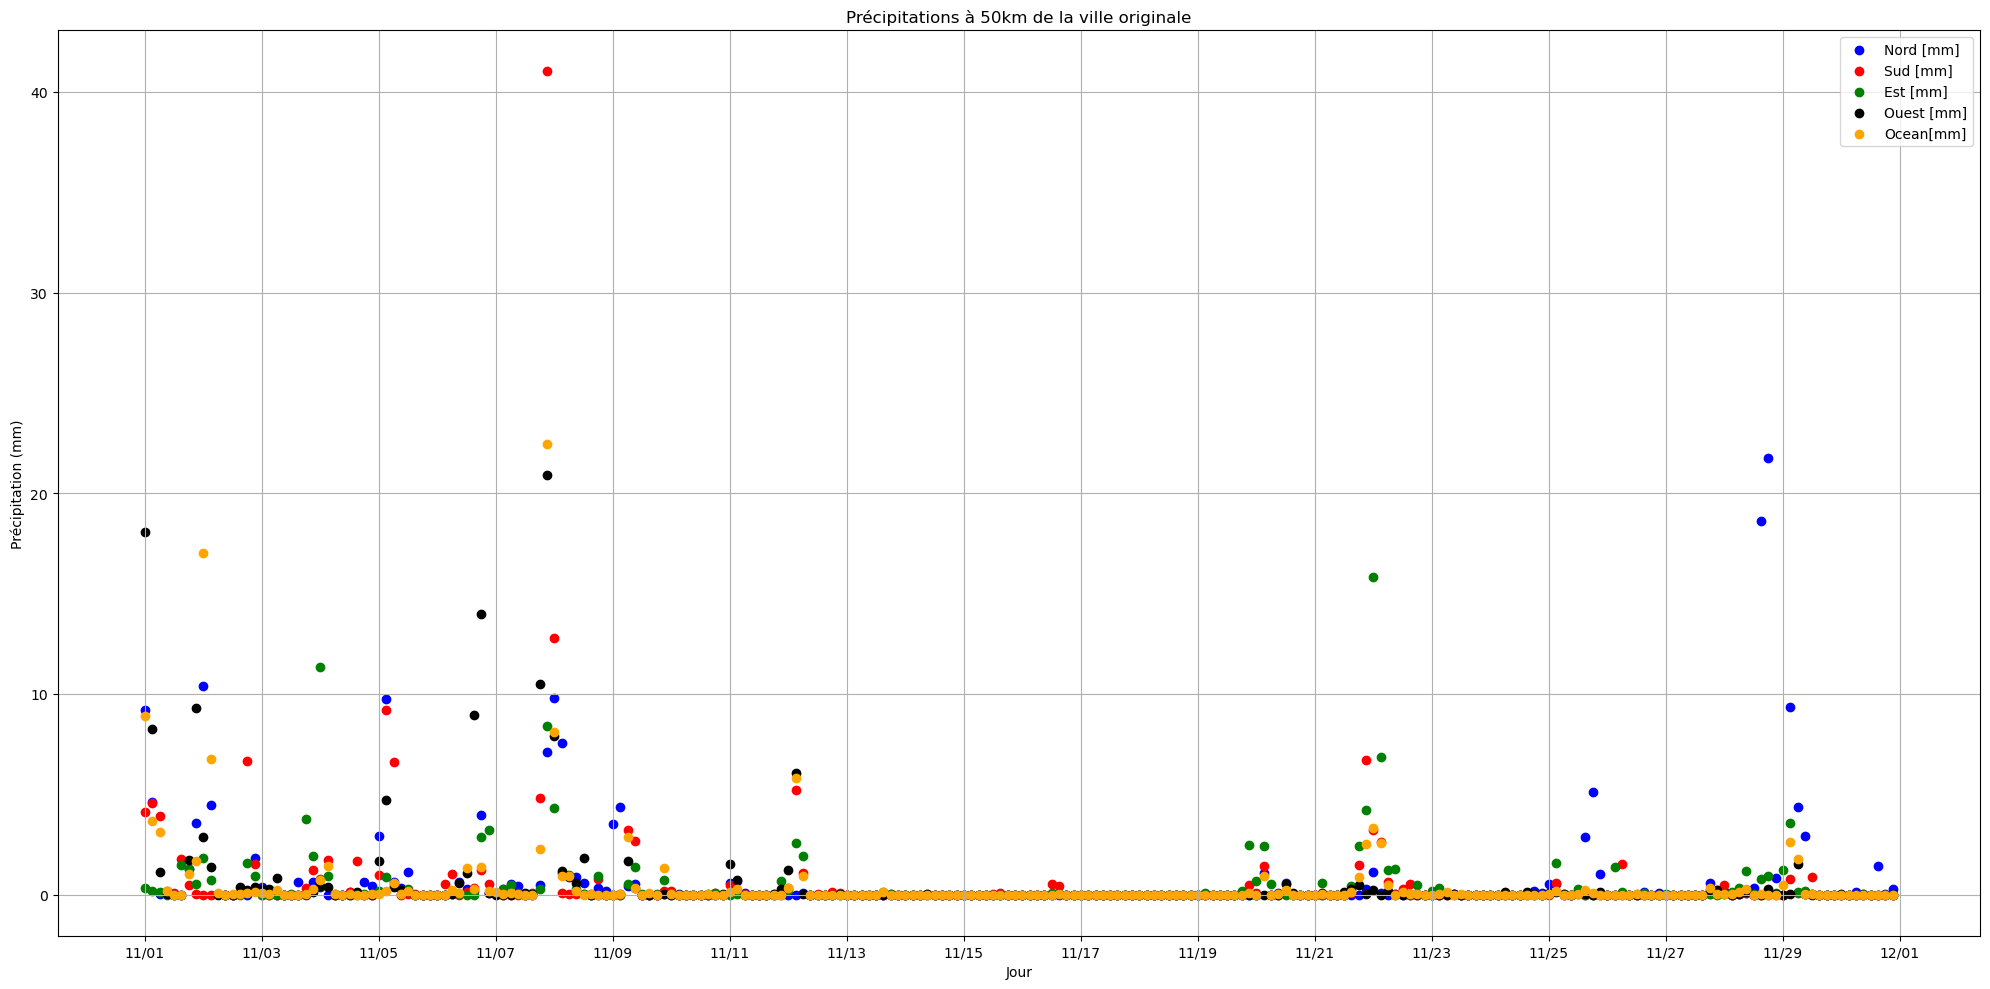

Nord :  0.8536507936773405 Sud: 0.37153517035503053 est : 0.8703958979563605 ouest :  0.6978394574710409


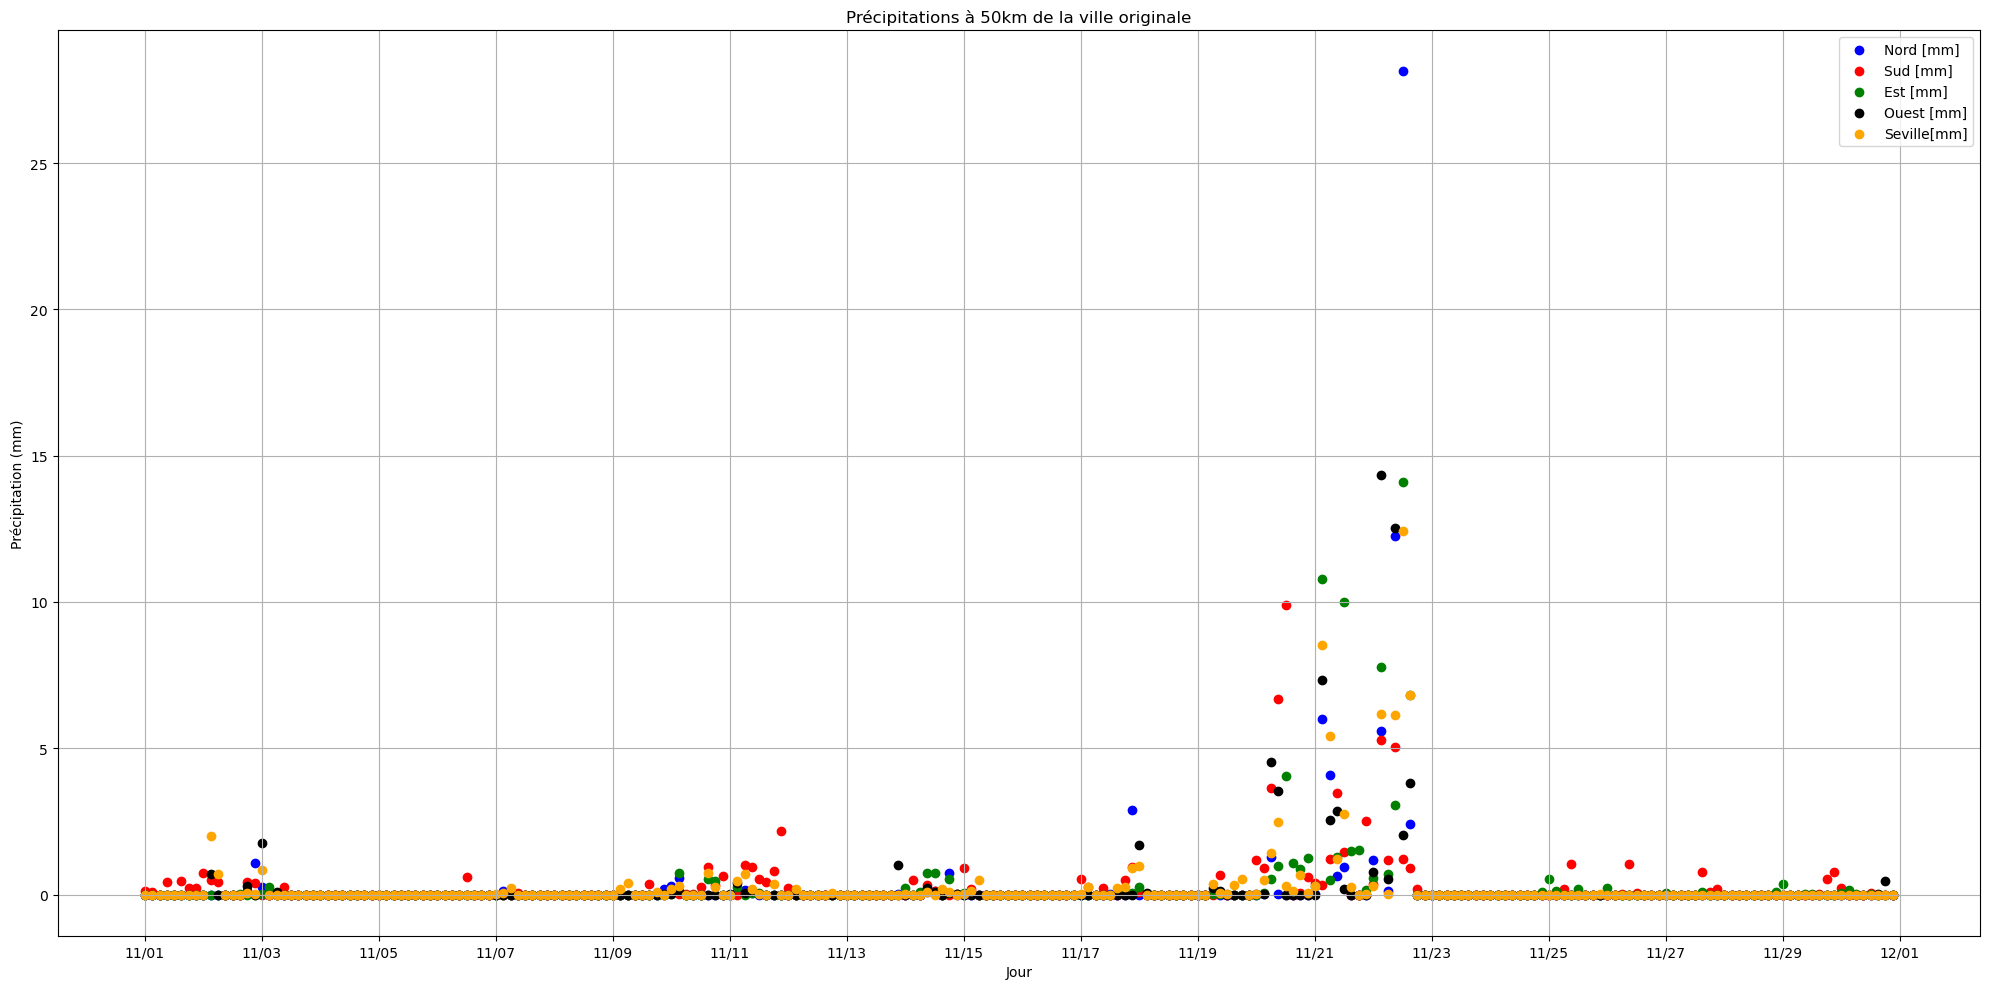

In [179]:
#3.f
#Correlation temporelle
approx_degree_km=111.32
noms_lignes=['Correlation Nord', 'Corellation sud', 'Corellation est', 'Corellation ouest']
data={}
i=0
for ville in liste_ville_n:
    lat_ville=ville['lat'].values[1]
    long_ville=ville['lon'].values[1]
    
    delta_lat = 50/approx_degree_km
    delta_lon = 50/ (111.32 * np.cos(np.radians(lat_ville)))

    nord_cor = {"lat":float(lat_ville+delta_lat),"lon":float(long_ville)}
    sud_cor = {"lat":float(lat_ville-delta_lat),"lon":float(long_ville)}
    est_cor = {"lat":float(lat_ville),"lon":float(long_ville+delta_lon)}
    ouest_cor = {"lat":float(lat_ville),"lon":float(long_ville-delta_lon)}
    
    nord_ds = ds.sel(nord_cor,method='nearest')
    sud_ds = ds.sel(sud_cor,method='nearest')
    est_ds = ds.sel(est_cor,method='nearest')
    ouest_ds = ds.sel(ouest_cor,method='nearest')
    
    precip_nord= nord_ds['precipitationCal'].values
    precip_sud= sud_ds['precipitationCal'].values
    precip_est= est_ds['precipitationCal'].values
    precip_ouest= ouest_ds['precipitationCal'].values
    
    correlation_nord= np.corrcoef(ville['precipitationCal'].values,precip_nord)[0,1]
    correlation_sud= np.corrcoef(ville['precipitationCal'].values,precip_sud)[0,1]
    correlation_est= np.corrcoef(ville['precipitationCal'].values,precip_est)[0,1]
    correlation_ouest= np.corrcoef(ville['precipitationCal'].values,precip_ouest)[0,1]
    liste_corr=[correlation_nord,correlation_sud,correlation_est,correlation_ouest]
    print('Nord : ',correlation_nord, 'Sud:',correlation_sud, "est :", correlation_est, 'ouest : ', correlation_ouest)
    data[liste_nom_ville[i]]=liste_corr
    y = ville.index.values
    
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    plt.scatter(y,precip_nord, color='blue', label='Nord [mm]')
    plt.scatter(y,precip_sud, color='red', label='Sud [mm]')
    plt.scatter(y,precip_est, color='green', label='Est [mm]')
    plt.scatter(y,precip_ouest, color='black', label='Ouest [mm]')
    plt.scatter(y,ville['precipitationCal'].values,color='orange', label=liste_nom_ville[i]+'[mm]')
    plt.title("Précipitations à 50km de la ville originale")
    plt.xlabel("Jour")
    plt.ylabel("Précipitation (mm)")
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    i+=1
df=pd.DataFrame(data, index=noms_lignes)
for nom_ligne in noms_lignes:
    tableau.loc[nom_ligne,liste_nom_ville]=df.loc[nom_ligne].values


In [189]:
from tabulate import tabulate
pd.set_option('display.expand_frame_repr', False)
print(tableau.to_markdown())

|                                         |      Kuala |       MTL |      Ocean |   Seville |
|:----------------------------------------|-----------:|----------:|-----------:|----------:|
| Accum.Total                             | 277.08     | 67.31     | 114.87     | 68.89     |
| Nombre de mesures avec precipitation    | 167        | 64        |  97        | 64        |
| Fréquence de précipitation [%]          |   0.7      |  0.27     |   0.4      |  0.27     |
| Precipitation moyenne [mm]              |   1.15     |  0.28     |   0.48     |  0.29     |
| Intensite de precipitation moyenne [mm] |   1.66     |  1.05     |   1.18     |  1.08     |
| Duree Max evenement [h]                 |  45        | 33        |  30        | 42        |
| Taux maximum precipitation              |  23.2486   |  7.88994  |  22.4578   | 12.4182   |
| Correlation Nord                        |   0.541078 |  0.850448 |   0.426702 |  0.853651 |
| Corellation sud                         |   0.504424 |  0.

In [200]:
for ville in liste_ville_n:
    df_3h = ville[ville.index.time == pd.to_datetime('00:00:00').time()]['precipitationCal'].values
    df_6h = ville[ville.index.time == pd.to_datetime('03:00:00').time()]['precipitationCal'].values
    df_3h = ville[ville.index.time == pd.to_datetime('06:00:00').time()]['precipitationCal'].values
    df_3h = ville[ville.index.time == pd.to_datetime('09:00:00').time()]['precipitationCal'].values
    df_3h = ville[ville.index.time == pd.to_datetime('12:00:00').time()]['precipitationCal'].values
    df_3h = ville[ville.index.time == pd.to_datetime('15:00:00').time()]['precipitationCal'].values
    df_3h = ville[ville.index.time == pd.to_datetime('18:00:00').time()]['precipitationCal'].values
    df_3h = ville[ville.index.time == pd.to_datetime('21:00:00').time()]['precipitationCal'].values


AttributeError: 'Index' object has no attribute 'timedelta'

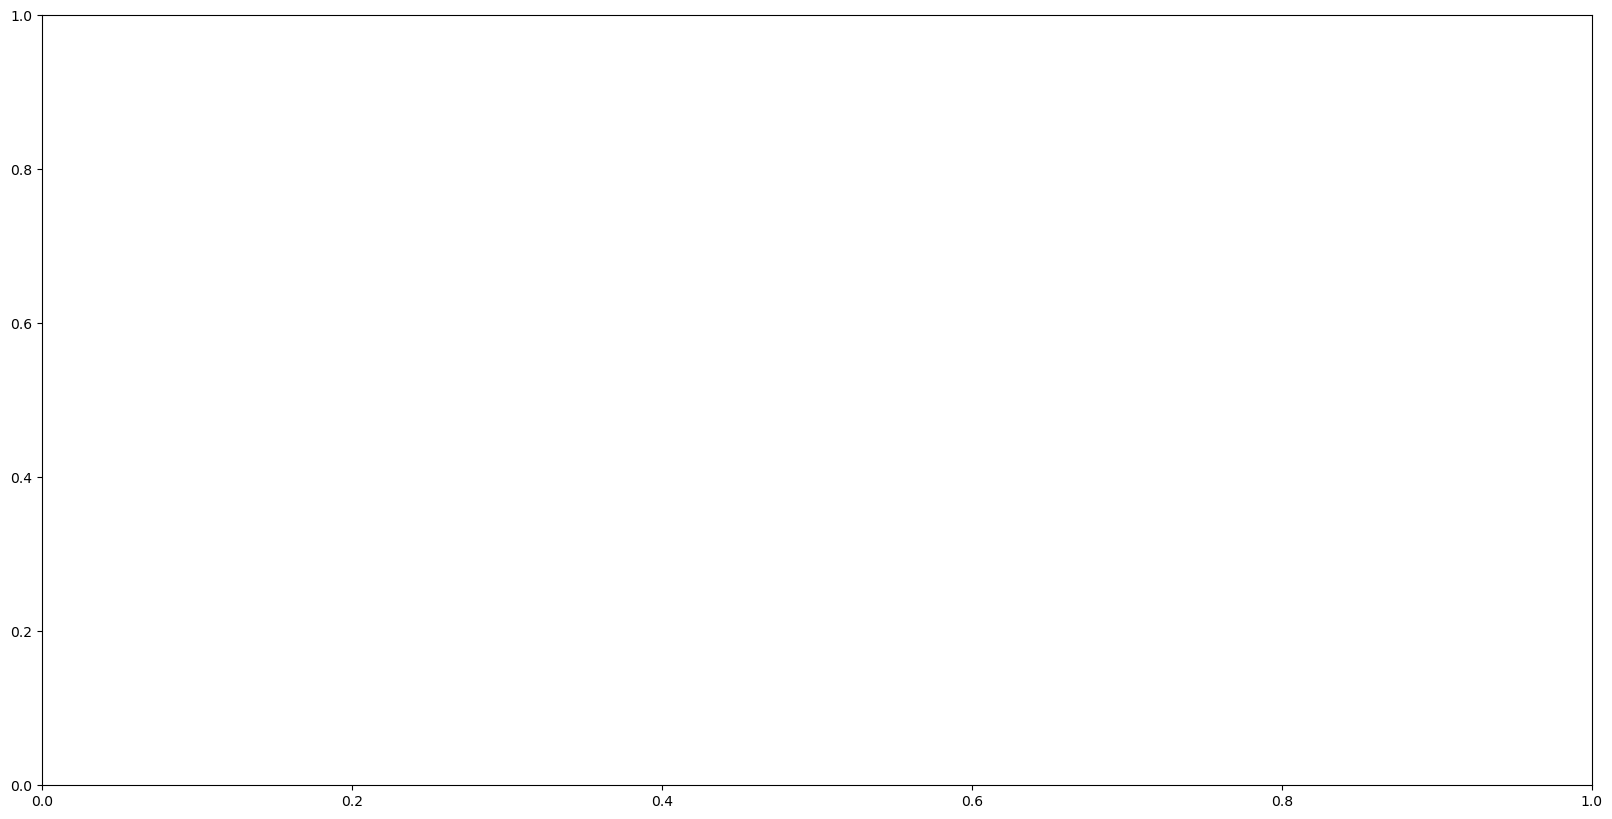

In [219]:
resultat_par_ville={}
for i,ville in enumerate(liste_ville_n):
    ville['hour_bin']=(ville.index.hour//3)*3
    groupe = ville.groupby('hour_bin')['precipitationCal'].mean()
    resultat_par_ville[liste_nom_ville[i]]=groupe
    
df_final = pd.DataFrame(resultat_par_ville)
df_final.index = df_final.index.map(lambda h: datetime.time(hour=h))
for i,ville in enumerate(liste_ville_n):
    fig, ax = plt.subplots(1,1,figsize=(20,10))
    y=df_final['Kuala'].index.timedelta(hours=4)


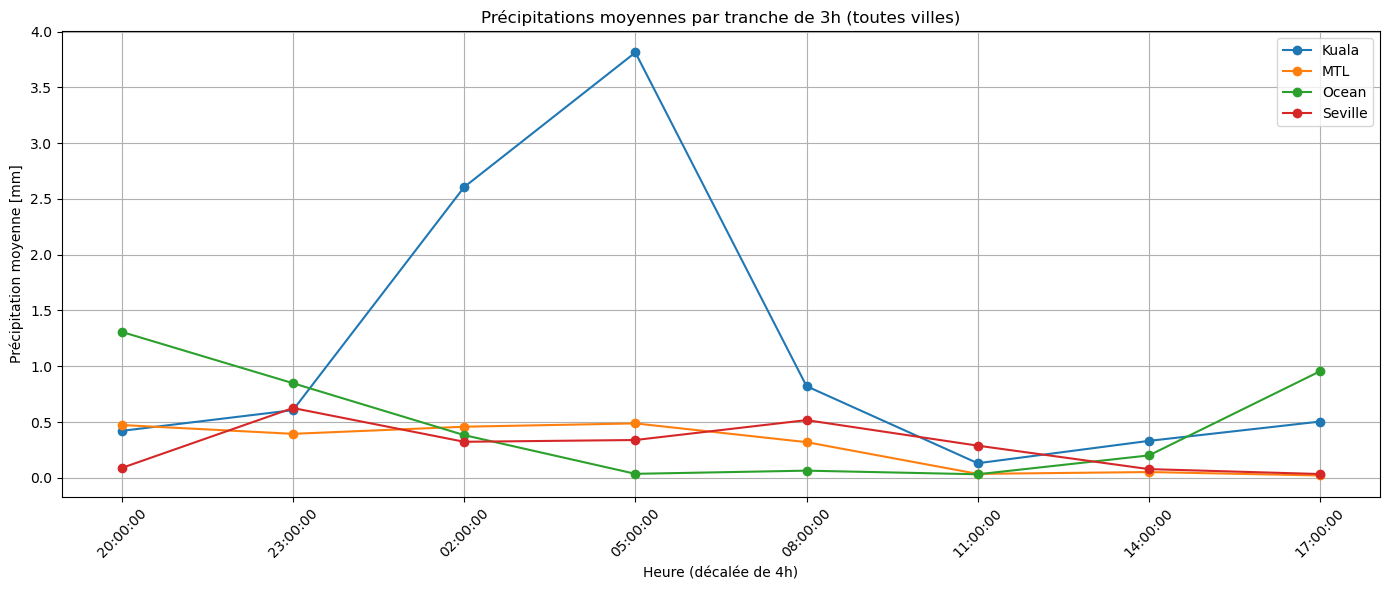

In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Dictionnaire pour stocker les moyennes par tranche horaire pour chaque ville
resultat_par_ville = {}

# Parcours de chaque ville
for i, ville in enumerate(liste_ville_n):
    # Crée une colonne hour_bin contenant des tranches de 3h (0,3,6,...,21)
    ville['hour_bin'] = (ville.index.hour // 3) * 3
    
    # Moyenne de la précipitation pour chaque tranche de 3h
    groupe = ville.groupby('hour_bin')['precipitationCal'].mean()
    
    # Stocke le résultat dans un dictionnaire
    resultat_par_ville[liste_nom_ville[i]] = groupe

# Création du DataFrame final (lignes = tranches horaires, colonnes = villes)
df_final = pd.DataFrame(resultat_par_ville)

# ---------------------
# 🔁 Transformation de l'index (hour_bin) en datetime.time pour un bel affichage
# ---------------------

# Fonction pour transformer un entier d'heure (0,3,6,...) en datetime.time
def hour_bin_to_time(h):
    return datetime.time(hour=int(h))

df_final.index = df_final.index.map(hour_bin_to_time)

# ---------------------
# ⏱️ Décalage optionnel de 4h (si tu veux aligner autrement)
# ---------------------

def decaler_heure(h, decalage=4):
    total_heures = (h.hour - decalage) % 24
    return datetime.time(hour=total_heures)

# Décale toutes les heures de l'index de 4h
df_final.index = df_final.index.map(lambda h: decaler_heure(h, decalage=4))

# ---------------------
# 📈 Tracé du graphique
# ---------------------

fig, ax = plt.subplots(figsize=(14, 6))

# Tracer chaque ville
for ville in df_final.columns:
    ax.plot(df_final.index.astype(str), df_final[ville], marker='o', label=ville)


ax.set_xlabel('Heure (décalée de 4h)')
ax.set_ylabel('Précipitation moyenne [mm]')
ax.set_title("Précipitations moyennes par tranche de 3h (toutes villes)")
ax.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


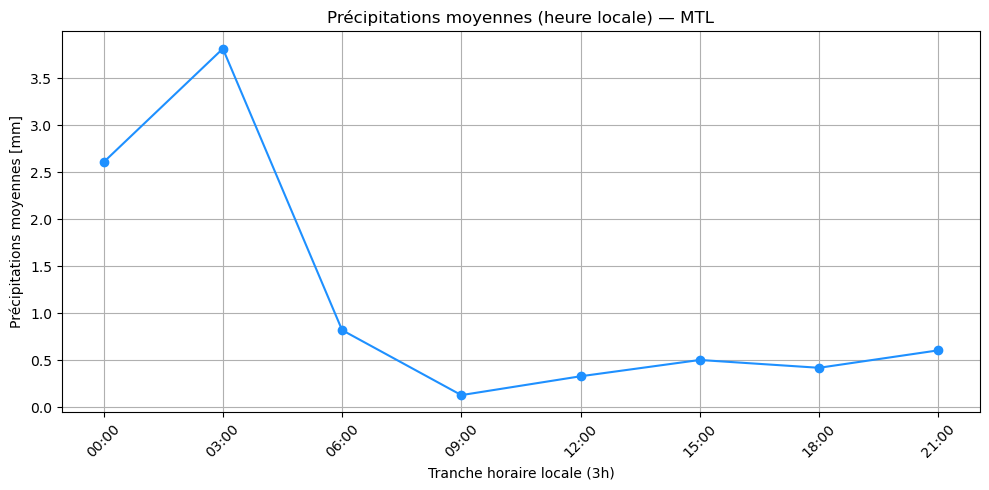

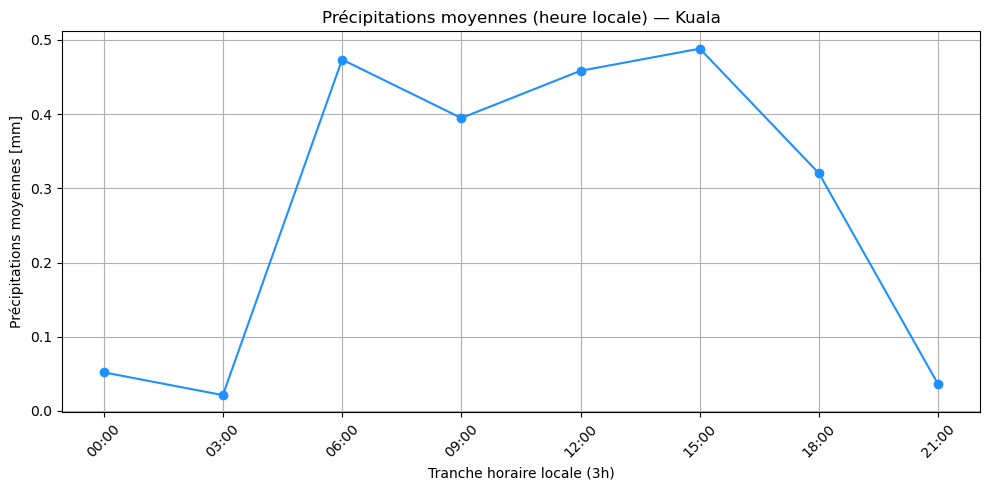

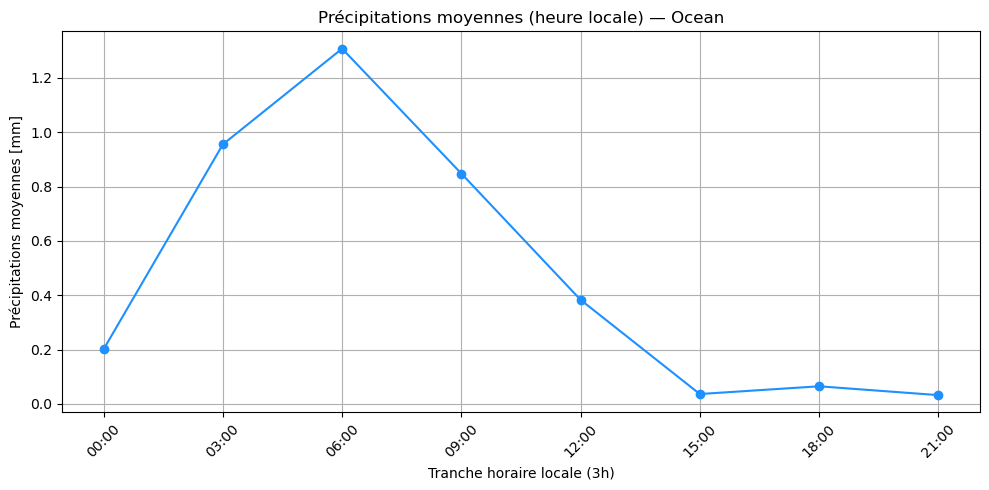

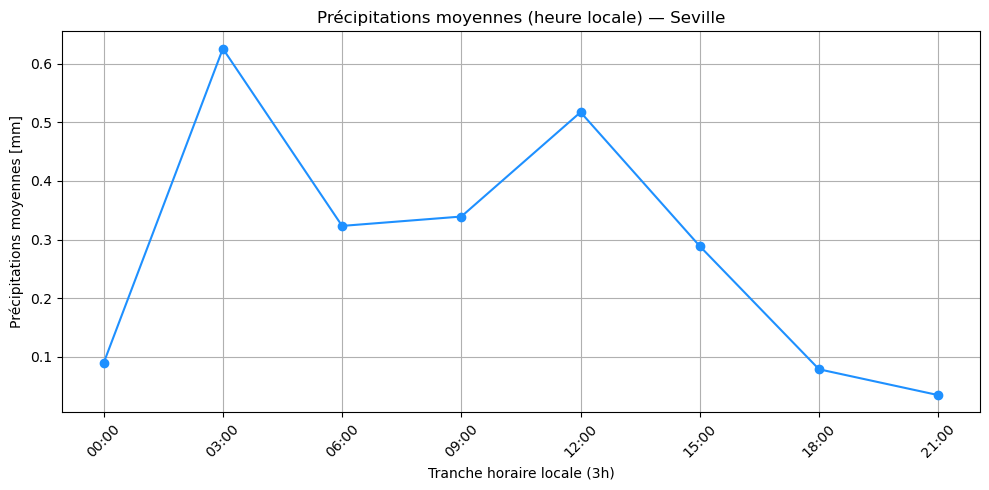

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

# Tranches horaires de 3h (heure locale, sans décalage)
tranches_3h = list(range(0, 24, 3))  # [0, 3, ..., 21]

# Liste des noms des villes (ordre = celui de liste_ville_n)
liste_nom_ville = ['MTL', 'Kuala', 'Ocean', 'Seville']

# Décalages horaires personnalisés pour chaque ville
decalages = {'MTL': -4, 'Kuala': 8, 'Ocean': 7, 'Seville': 2}

# Labels horaires à afficher (00:00, 03:00, ..., 21:00)
labels_heures = [f"{h:02d}:00" for h in tranches_3h]

# Boucle sur chaque ville pour tracer son propre graphique
for i, ville in enumerate(liste_ville_n):
    nom_ville = liste_nom_ville[i]
    decalage = decalages[nom_ville]
    moyennes = []

    for h in tranches_3h:
        # Décalage inverse pour sélectionner la bonne tranche UTC
        heure_debut = (h - decalage) % 24
        heure_fin = (heure_debut + 3) % 24

        # Gestion des tranches normales et des passages minuit
        if heure_debut < heure_fin:
            masque = (ville.index.hour >= heure_debut) & (ville.index.hour < heure_fin)
        else:
            masque = (ville.index.hour >= heure_debut) | (ville.index.hour < heure_fin)

        subset = ville.loc[masque, 'precipitationCal']
        moyenne = subset.mean()
        moyennes.append(moyenne)

    # Tracer le graphique individuel
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(labels_heures, moyennes, marker='o', color='dodgerblue')
    ax.set_title(f"Précipitations moyennes (heure locale) — {nom_ville}")
    ax.set_xlabel("Tranche horaire locale (3h)")
    ax.set_ylabel("Précipitations moyennes [mm]")
    ax.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
